In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

import tensorflow as tf
import keras

from keras.models import Sequential,load_model

In [164]:
import os
import math
import random

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import activations

In [165]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"]=False



from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer,load_boston,load_iris,make_moons,load_digits
from sklearn.datasets import load_diabetes,load_wine 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance,plot_tree

# pip inastall lightgbbm
from lightgbm import LGBMClassifier,LGBMRegressor
from lightgbm import plot_importance,plot_tree,plot_metric
import statsmodels.api as sm

import os
os.environ["PATH"]+=os.pathsep +"C:/Program Files/Graphviz/bin"
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error

In [216]:
train_1 = pd.read_csv("data/lunch_df_encoding.csv")
train_2 = pd.read_csv("data/dinner_df_encoding.csv")
test_1 = pd.read_csv("data/lunch_test_encoding.csv")
test_2 = pd.read_csv("data/dinner_test_encoding.csv")

### 1. 중식계훈련 데이터 

In [254]:
print(train_1.shape)
train_1.info()


(1203, 30)


In [255]:
train_1.isnull().sum()

datetime                 0
month                    0
date                     0
worker_number            0
real_number              0
vacation_number          0
biztrip_number           0
overtime_number          0
telecom_number           0
temperature              0
rain                     0
wind                     0
humidity                 0
discomfort_index         0
perceived_temperature    0
lunch_rice               0
lunch_number             0
season_fall              0
season_spring            0
season_summer            0
season_winter            0
weekdays_friday          0
weekdays_monday          0
weekdays_thursday        0
weekdays_tuesday         0
weekdays_wednesday       0
vacation_N               0
vacation_Y               0
new_lunch_N              0
new_lunch_Y              0
dtype: int64

In [256]:
train_1 = train_1.dropna()

In [257]:
X = train_1.drop(columns=["lunch_number","datetime"],axis=1)
y = train_1["lunch_number"]
X
y
y


0       1039
1        867
2       1017
3        978
4        925
        ... 
1200    1093
1201     832
1202     579
1203    1145
1204    1015
Name: lunch_number, Length: 1203, dtype: int64

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


### 1. XGBRegressor 활용 

In [259]:
####(1)train 데이터로 훈련-중식계

In [260]:
xgbr= XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective="reg:squarederror")
xgbr.fit(X_train,y_train)
print("훈련정확도:",xgbr.score(X_train,y_train))
print("훈련정확도:",xgbr.score(X_test,y_test))

훈련정확도: 0.9649338178513723
훈련정확도: 0.8372550299571899


In [261]:
cross_val=cross_validate(estimator=xgbr,X=X_train,y=y_train,cv=5)
cross_val

{'fit_time': array([0.46276164, 0.42582226, 0.44375348, 0.41999245, 0.45212746]),
 'score_time': array([0.00398946, 0.00498652, 0.0039885 , 0.00498629, 0.00498605]),
 'test_score': array([0.78664167, 0.77942846, 0.7837154 , 0.78035218, 0.77690545])}

In [262]:
print("테스트 정확도 평균:", cross_val["test_score"].mean())

테스트 정확도 평균: 0.7814086317547565


In [263]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))
RMSE: 1.83 


MSE: 7250.32
RMSE: 85.15


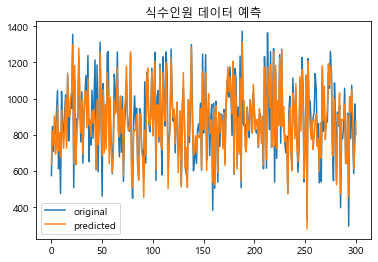

In [264]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("식수인원 데이터 예측")
plt.legend()
plt.show()


In [267]:
####(1)train 데이터로 훈련-석식계

train_2.shape
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               1205 non-null   object 
 1   month                  1205 non-null   int64  
 2   date                   1205 non-null   int64  
 3   worker_number          1205 non-null   int64  
 4   real_number            1205 non-null   int64  
 5   vacation_number        1205 non-null   int64  
 6   biztrip_number         1205 non-null   int64  
 7   overtime_number        1205 non-null   int64  
 8   telecom_number         1205 non-null   int64  
 9   temperature            1204 non-null   float64
 10  rain                   1205 non-null   float64
 11  wind                   1204 non-null   float64
 12  humidity               1205 non-null   float64
 13  discomfort_index       1204 non-null   float64
 14  perceived_temperature  1203 non-null   float64
 15  dinn

In [268]:
train_2 = train_2.dropna()

In [269]:
X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y


0       331
1       560
2       573
3       525
4       330
       ... 
1200    421
1201    353
1202    217
1203    502
1204    480
Name: dinner_number, Length: 1203, dtype: int64

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [271]:
xgbr= XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective="reg:squarederror")
xgbr.fit(X_train,y_train)
print("훈련정확도:",xgbr.score(X_train,y_train))
print("훈련정확도:",xgbr.score(X_test,y_test))

훈련정확도: 0.949973852653645
훈련정확도: 0.6765919296234455


In [272]:
cross_val=cross_validate(estimator=xgbr,X=X_train,y=y_train,cv=5)
cross_val

{'fit_time': array([0.47423911, 0.45433545, 0.45578313, 0.42994285, 0.4054637 ]),
 'score_time': array([0.0039897 , 0.00398993, 0.00499129, 0.00417423, 0.00398898]),
 'test_score': array([0.55105686, 0.61418067, 0.55957588, 0.54975064, 0.71843333])}

In [273]:
print("테스트 정확도 평균:", cross_val["test_score"].mean())

테스트 정확도 평균: 0.5985994791501446


In [274]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))
RMSE: 1.83 


MSE: 6451.01
RMSE: 80.32


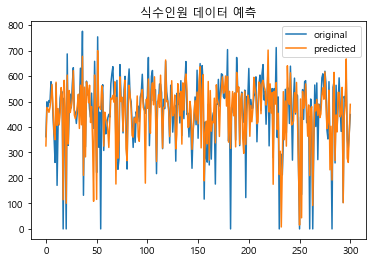

In [275]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("식수인원 데이터 예측")
plt.legend()
plt.show()

### 2. LGBMRegressor 활용 

In [ ]:
####(1)train 데이터로 훈련-중식계

In [251]:
lgbr= LGBMRegressor(n_estimators=400)
lgbr.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=[(X_test,y_test)],verbose= True)

print("훈련정확도:",lgbr.score(X_train,y_train))
print("테스트정확도:",lgbr.score(X_test,y_test))

cross_val=cross_validate(estimator=xgbr,X=X_test,y=y_test,cv=5)
cross_val

print("테스트 정확도 평균:", cross_val["test_score"].mean())

[1]	valid_0's l2: 39064.2
[2]	valid_0's l2: 34497.7
[3]	valid_0's l2: 30441.3
[4]	valid_0's l2: 27075.1
[5]	valid_0's l2: 24460.7
[6]	valid_0's l2: 22199.3
[7]	valid_0's l2: 20391.9
[8]	valid_0's l2: 18741.8
[9]	valid_0's l2: 17640.2
[10]	valid_0's l2: 16612.2
[11]	valid_0's l2: 15559
[12]	valid_0's l2: 14764.2
[13]	valid_0's l2: 14225.7
[14]	valid_0's l2: 13329.3
[15]	valid_0's l2: 12615.5
[16]	valid_0's l2: 12032.5
[17]	valid_0's l2: 11607.8
[18]	valid_0's l2: 11202.4
[19]	valid_0's l2: 10851
[20]	valid_0's l2: 10540.8
[21]	valid_0's l2: 10231.4
[22]	valid_0's l2: 10035.7
[23]	valid_0's l2: 9770.85
[24]	valid_0's l2: 9596.78
[25]	valid_0's l2: 9381.65
[26]	valid_0's l2: 9205.83
[27]	valid_0's l2: 9042.06
[28]	valid_0's l2: 8947.07
[29]	valid_0's l2: 8837.89
[30]	valid_0's l2: 8794.85
[31]	valid_0's l2: 8687.79
[32]	valid_0's l2: 8583.94
[33]	valid_0's l2: 8533.8
[34]	valid_0's l2: 8465.59
[35]	valid_0's l2: 8394.27
[36]	valid_0's l2: 8317.64
[37]	valid_0's l2: 8310.19
[38]	valid_0's 

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

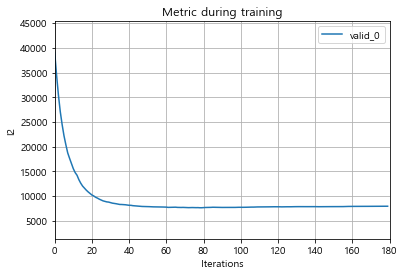

In [252]:
plot_metric(lgbr)

In [276]:
####(2)train 데이터로 훈련-석식계

In [277]:
train_2 = train_2.dropna()

X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [278]:
lgbr= LGBMRegressor(n_estimators=400)
lgbr.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=[(X_test,y_test)],verbose= True)

print("훈련정확도:",lgbr.score(X_train,y_train))
print("테스트정확도:",lgbr.score(X_test,y_test))

cross_val=cross_validate(estimator=xgbr,X=X_test,y=y_test,cv=5)
cross_val

print("테스트 정확도 평균:", cross_val["test_score"].mean())

[1]	valid_0's l2: 17586.4
[2]	valid_0's l2: 15739.3
[3]	valid_0's l2: 14267.2
[4]	valid_0's l2: 12916.1
[5]	valid_0's l2: 11837.2
[6]	valid_0's l2: 11030.4
[7]	valid_0's l2: 10316.3
[8]	valid_0's l2: 9816.79
[9]	valid_0's l2: 9253.85
[10]	valid_0's l2: 8815.23
[11]	valid_0's l2: 8375.56
[12]	valid_0's l2: 8050.25
[13]	valid_0's l2: 7748.37
[14]	valid_0's l2: 7506.91
[15]	valid_0's l2: 7302.05
[16]	valid_0's l2: 7109.62
[17]	valid_0's l2: 6992.92
[18]	valid_0's l2: 6804.74
[19]	valid_0's l2: 6656.42
[20]	valid_0's l2: 6528.06
[21]	valid_0's l2: 6470.11
[22]	valid_0's l2: 6350.23
[23]	valid_0's l2: 6343.5
[24]	valid_0's l2: 6317.44
[25]	valid_0's l2: 6270.92
[26]	valid_0's l2: 6204.73
[27]	valid_0's l2: 6138.81
[28]	valid_0's l2: 6103.47
[29]	valid_0's l2: 6032.07
[30]	valid_0's l2: 5981.59
[31]	valid_0's l2: 5951.54
[32]	valid_0's l2: 5949.69
[33]	valid_0's l2: 5921.76
[34]	valid_0's l2: 5955.38
[35]	valid_0's l2: 5977.3
[36]	valid_0's l2: 5976.15
[37]	valid_0's l2: 6003.54
[38]	valid_0

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

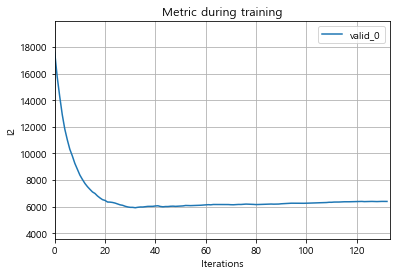

In [279]:
plot_metric(lgbr)

### 3. LinearRegression

In [301]:
####(1)train 데이터로 훈련-중식계

In [303]:
train_1 = train_1.dropna()

X = train_1.drop(columns=["lunch_number","datetime"],axis=1)
y = train_1["lunch_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [305]:
eater_model =LinearRegression()
eater_model.fit(X_train,y_train)
eater_model.fit(X_test,y_test)

print("훈련정확도:",eater_model.score(X_train,y_train))
print("훈련정확도:",eater_model.score(X_test,y_test))

훈련정확도: 0.7517191803800323
훈련정확도: 0.8172888065201844


In [306]:
pred1 = eater_model.predict(X_test)

In [294]:
####(2)train 데이터로 훈련-석식계

In [295]:
train_2 = train_2.dropna()

X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [296]:
eater_model =LinearRegression()
eater_model.fit(X_train,y_train)
eater_model.fit(X_test,y_test)
print("훈련정확도:",xgbr.score(X_train,y_train))
print("훈련정확도:",xgbr.score(X_test,y_test))

훈련정확도: 0.949973852653645
훈련정확도: 0.6765919296234455


In [290]:
pred1 = eater_model.predict(X_test)

array([328.24761018, 484.24103408, 416.89747092, 393.0912254 ,
       461.33356499, 511.12754853, 540.4829872 , 424.55013899,
       366.23123344, 280.51814342, 578.84350872, 327.38901983,
       428.03019239, 370.08769244, 388.6979379 , 506.97241028,
       535.02659864, 293.70870768, 463.91222746, 320.016357  ,
       256.18643705, 645.59830756, 417.13582668, 589.80580615,
       421.89306892, 507.58418957, 547.62808291, 633.32786837,
       352.26155117, 488.78358252, 480.01546139, 445.68807802,
       504.73769656, 467.87131627, 530.80441813, 374.02359145,
       610.71349648, 256.17568457, 529.95686838, 347.70569767,
       525.26257332, 477.13655902, 578.67958475, 557.27015541,
       432.97162415, 536.48534083, 461.80434387, 324.19678113,
       665.38391416, 351.42641493, 101.48315576, 574.79503207,
       462.35881627, 515.3006817 , 311.98553789, 559.46297104,
       444.25363295, 327.3445967 , 424.60183798, 447.88870509,
       439.07337008, 394.94971708, 247.29247934, 440.73

### 4. Ridge

In [309]:
####(1)train 데이터로 훈련-중식계

In [310]:
train_1 = train_1.dropna()

X = train_1.drop(columns=["lunch_number","datetime"],axis=1)
y = train_1["lunch_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [311]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge.score(X_train,y_train))
print("테스트점수:",ridge.score(X_test,y_test))

훈련점수: 0.7785842772252942
테스트점수: 0.7876841241137968


In [312]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge10.score(X_train,y_train))
print("테스트점수:",ridge10.score(X_test,y_test))

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge01.score(X_train,y_train))
print("테스트점수:",ridge01.score(X_test,y_test))

훈련점수: 0.7776664701754177
테스트점수: 0.7870562976733818
훈련점수: 0.7785961708617393
테스트점수: 0.787651648443955


In [315]:
pred1 = ridge01.predict(X_test)

In [317]:
####(2)train 데이터로 훈련-석식계

In [318]:
train_2 = train_2.dropna()

X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [322]:
ridge = Ridge().fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge.score(X_train,y_train))
print("테스트점수:",ridge.score(X_test,y_test))

훈련점수: 0.49732247491835335
테스트점수: 0.5083613287261718


In [323]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge10.score(X_train,y_train))
print("테스트점수:",ridge10.score(X_test,y_test))

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train) #alpha=1.0

print("훈련점수:",ridge01.score(X_train,y_train))
print("테스트점수:",ridge01.score(X_test,y_test))

훈련점수: 0.49675766800987353
테스트점수: 0.5098888253883027
훈련점수: 0.49733066872489073
테스트점수: 0.5080562892158669


In [321]:
pred1 = ridge01.predict(X_test)

### 5.Lasso

In [ ]:
####(1)train 데이터로 훈련-중식계

In [325]:
train_1 = train_1.dropna()

X = train_1.drop(columns=["lunch_number","datetime"],axis=1)
y = train_1["lunch_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [328]:
from sklearn.linear_model import Lasso
lasso= Lasso().fit(X_train,y_train)
print("훈련점수:",lasso.score(X_train,y_train))
print("테스트점수:",lasso.score(X_test,y_test))

lasso001= Lasso(alpha=0.01).fit(X_train,y_train)
print("훈련점수:",lasso001.score(X_train,y_train))
print("테스트점수:",lasso001.score(X_test,y_test))

훈련점수: 0.7747733356203582
테스트점수: 0.7820478634887891
훈련점수: 0.7785957565109678
테스트점수: 0.7876767701035949


In [329]:
pred1 = lasso001.predict(X_test)

In [330]:
####(1)train 데이터로 훈련-석식계

In [331]:
train_2 = train_2.dropna()

X = train_2.drop(columns=["dinner_number","datetime"],axis=1)
y = train_2["dinner_number"]
X
y
y

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(902, 28) (301, 28)


In [333]:
lasso= Lasso().fit(X_train,y_train)
print("훈련점수:",lasso.score(X_train,y_train))
print("테스트점수:",lasso.score(X_test,y_test))

lasso001= Lasso(alpha=0.01).fit(X_train,y_train)
print("훈련점수:",lasso001.score(X_train,y_train))
print("테스트점수:",lasso001.score(X_test,y_test))

훈련점수: 0.4930928917773645
테스트점수: 0.5004780432744087
훈련점수: 0.4972383031920601
테스트점수: 0.5083743503517701


In [334]:
pred1 = lasso001.predict(X_test)

### 6. 마지막 테스트 검증 

In [364]:
x_train = train_1[['weekdays_friday','weekdays_monday', 'weekdays_thursday','weekdays_tuesday','weekdays_wednesday','worker_number',
                 'biztrip_number', 'overtime_number', 'telecom_number']]

y1_train = train_1['lunch_number']
y2_train = train_2['dinner_number']

x_test = test_1[['weekdays_friday','weekdays_monday', 'weekdays_thursday','weekdays_tuesday','weekdays_wednesday','worker_number',
                 'biztrip_number', 'overtime_number', 'telecom_number']]

In [365]:
xgbr1= XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective="reg:squarederror")
xgbr2= XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective="reg:squarederror")

In [366]:
xgbr1.fit(x_train, y1_train)
xgbr2.fit(x_train, y2_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [370]:
pred1 = xgbr1.predict(x_test)
pred2 = xgbr2.predict(x_test)

array([ 988.1463 ,  981.09076,  644.80817, 1205.0834 , 1019.46655,
        968.15906,  937.8222 ,  611.1846 , 1202.4464 ,  999.13354,
        939.20703, 1304.8575 , 1106.9589 , 1016.0735 ,  819.69775,
        605.11804, 1236.675  ,  956.29407,  778.5877 ,  727.1954 ,
        551.29486, 1067.1859 , 1080.0548 ,  894.87616,  522.3206 ,
       1289.2878 , 1200.9773 ,  950.04694,  870.3381 ,  650.4104 ,
       1229.8412 , 1002.33624, 1065.2914 ,  923.07214,  605.2581 ,
       1280.9822 , 1025.5455 ,  925.25446,  768.51636,  552.4156 ,
       1214.8691 , 1020.6857 ,  961.9093 ,  800.42865,  555.4108 ,
       1214.3195 , 1026.1467 , 1020.527  ,  859.3396 ,  551.745  ],
      dtype=float32)

In [369]:
lgbr1= LGBMRegressor(n_estimators=400)
lgbr2= LGBMRegressor(n_estimators=400)

In [345]:
lgbr1.fit(x_train, y1_train)
lgbr2.fit(x_train, y2_train)

LGBMRegressor(n_estimators=400)

In [346]:
pred1 = lgbr1.predict(x_test)
pred2 = lgbr2.predict(x_test)

In [349]:
eater_model1 =LinearRegression()
eater_model2 =LinearRegression()

In [350]:
eater_model1.fit(x_train, y1_train)
eater_model2.fit(x_train, y2_train)

LinearRegression()

In [352]:
pred1 = eater_model1.predict(x_test)
pred2 = eater_model2.predict(x_test)

In [353]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge02 = Ridge(alpha=0.1).fit(X_train,y_train)

In [356]:
ridge01.fit(x_train, y1_train)
ridge02.fit(x_train, y2_train)

Ridge(alpha=0.1)

In [358]:
pred1 =ridge01.predict(x_test)
pred2 =ridge02.predict(x_test)

In [359]:
lasso001= Lasso(alpha=0.01).fit(X_train,y_train)
lasso002= Lasso(alpha=0.01).fit(X_train,y_train)

In [360]:
lasso001.fit(x_train, y1_train)
lasso002.fit(x_train, y2_train)

Lasso(alpha=0.01)

In [362]:
pred1 =lasso001.predict(x_test)
pred2 =lasso002.predict(x_test)

In [65]:
#### 정규화 
mean= X_train.mean(axis=0)
X_train -=mean
std=X_train.std(axis=0)

X_train/=std
X_test-=mean
X_test/=std

In [382]:
#### 실패한 딥러낭 ㅠㅠ

model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation="softmax",input_shape=(28,)),
    tf.keras.layers.Dense(units=32,activation="softmax"),
    tf.keras.layers.Dense(units=32,activation="softmax"),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss="mse",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["mae"])#평균제곱오차 
model.fit(X_train,y_train,epochs=100,batch_size=1)

Epoch 1/100
902/902 [==============================] - 3s 2ms/step - loss: 232987.5312 - mae: 462.4754
Epoch 2/100
902/902 [==============================] - 2s 3ms/step - loss: 230811.1250 - mae: 460.2938
Epoch 3/100
902/902 [==============================] - 2s 3ms/step - loss: 228559.5938 - mae: 458.0236
Epoch 4/100
902/902 [==============================] - 2s 2ms/step - loss: 226790.4219 - mae: 456.2266
Epoch 5/100
902/902 [==============================] - 2s 3ms/step - loss: 225165.3906 - mae: 454.5738
Epoch 6/100
902/902 [==============================] - 2s 2ms/step - loss: 223584.0156 - mae: 452.9664
Epoch 7/100
902/902 [==============================] - 2s 3ms/step - loss: 222022.5312 - mae: 451.3614
Epoch 8/100
902/902 [==============================] - 2s 3ms/step - loss: 220474.0000 - mae: 449.7751
Epoch 9/100
902/902 [==============================] - 2s 3ms/step - loss: 218934.1562 - mae: 448.1923
Epoch 10/100
902/902 [==============================] - 2s 3ms/step - los

902/902 [==============================] - 2s 2ms/step - loss: 127213.6484 - mae: 338.9063
Epoch 80/100
902/902 [==============================] - 3s 3ms/step - loss: 126128.9844 - mae: 337.3806
Epoch 81/100
902/902 [==============================] - 3s 3ms/step - loss: 125048.3203 - mae: 335.8589: 0s - loss: 123409.7422 - mae - ETA: 0s - los
Epoch 82/100
902/902 [==============================] - 3s 3ms/step - loss: 123975.0938 - mae: 334.3442
Epoch 83/100
902/902 [==============================] - 3s 3ms/step - loss: 122908.9922 - mae: 332.8335
Epoch 84/100
902/902 [==============================] - 2s 2ms/step - loss: 121849.8359 - mae: 331.3159
Epoch 85/100
902/902 [==============================] - 2s 3ms/step - loss: 120797.3047 - mae: 329.8027
Epoch 86/100
902/902 [==============================] - 3s 3ms/step - loss: 119751.8828 - mae: 328.2829
Epoch 87/100
902/902 [==============================] - 3s 3ms/step - loss: 118712.5859 - mae: 326.7926
Epoch 88/100
902/902 [=========